In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

In [3]:
gaussians = []
gaussians.append(gaussian(A = np.ones(2),
                          M = np.array([7, 7]),
                          S = np.array([1, 0.5])))
gaussians.append(gaussian(A = np.ones(2),
                          M = np.array([-7, -7]),
                          S = np.array([1, 0.5])))

/home/pelegs/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pelegs/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


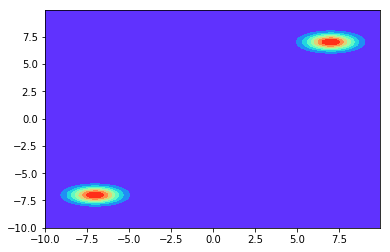

In [4]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sum(g.get_value([xx, yy]) for g in gaussians)
h = plt.contourf(x,y,z)

In [5]:
def normalize(vec):
    n = np.linalg.norm(vec)
    if n == 0:
        return vec * 0.0
    else:
        return vec / float(n)

In [6]:
U = potential(gaussians)
a,b = x.shape[0], y.shape[0]
ZU = np.zeros(shape=(a, b))
ZF = np.zeros(shape=(a, b, 2))
for i, X in enumerate(x):
    for j, Y in enumerate(y):
        ZU[i,j] = U.get_value([X, Y])

In [7]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
A = X.shape[0]
V = np.zeros((A, A))
W = np.zeros((A, A))
for i, xq in enumerate(X):
    for j, yq in enumerate(Y):
        V[i, j] = normalize(U.get_force([xq, yq])[1])
        W[i, j] = normalize(U.get_force([xq, yq])[0])

/home/pelegs/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/pelegs/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


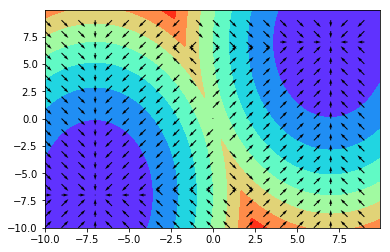

In [8]:
plt.contourf(x, y, ZU)
plt.quiver(X, Y, V, W)